# 1) 데이터 읽기

1. Area: Returns the number of pixels within the boundaries of the rice grain.
2. Perimeter: Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain.
3. Major Axis Length: The longest line that can be drawn on the rice grain, i.e. the main axis distance, gives.
4. Minor Axis Length: The shortest line that can be drawn on the rice grain, i.e. the small axis distance, gives.
5. Eccentricity: It measures how round the ellipse, which has the same moments as the rice grain, is.
6. Convex Area: Returns the pixel count of the smallest convex shell of the region formed by the rice grain.
7. Extent: Returns the ratio of the region formed by the rice grain to the bounding box pixels
8. Class: Commeo and Osmancik.

In [1]:
import pandas as pd

feature_name = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent', 'Class']
rice = pd.read_csv('./Rice.data', names = feature_name)

rice

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


# 2) 결측치 확인

In [2]:
# 결측치 확인
rice.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

# 3) 클래스 갯수 확인 (그래프, 레이블 갯수)

Text(0.5, 1.0, 'Commeo and Osmancik')

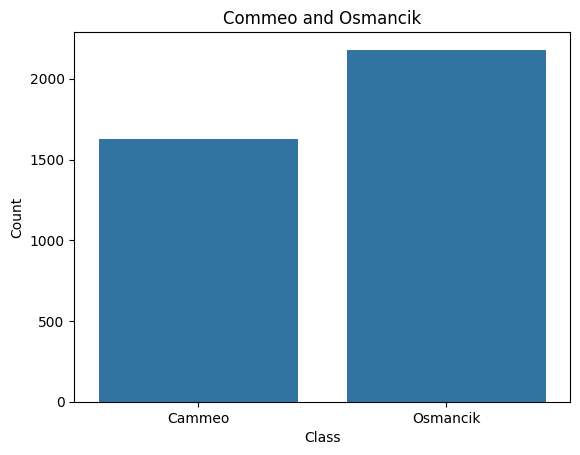

In [4]:
# 레이블 갯수 확인 (그래프)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = rice, x="Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Commeo and Osmancik")

In [6]:
# 레이블 갯수 확인 (숫자)
rice['Class'].value_counts()

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

# 5) X, Y 나누기

In [7]:
X = rice.drop('Class', axis = 1)
Y = rice['Class']

print(X.head())
print()
print(Y.value_counts())

    Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231  525.578979         229.749878          85.093788      0.928882   
1  14656  494.311005         206.020065          91.730972      0.895405   
2  14634  501.122009         214.106781          87.768288      0.912118   
3  13176  458.342987         193.337387          87.448395      0.891861   
4  14688  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent  
0        15617  0.572896  
1        15072  0.615436  
2        14954  0.693259  
3        13368  0.640669  
4        15262  0.646024  

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64


# 6) 데이터 스케일링

In [8]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler


scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled_data,
                            index = X.index,
                            columns = X.columns) 

X

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,1.479830,2.004354,2.348547,-0.212943,2.018337,1.499659,-1.152921
1,1.147870,1.125853,0.988390,0.945568,0.410018,1.192918,-0.602079
2,1.135169,1.317214,1.451908,0.253887,1.212956,1.126504,0.405611
3,0.293436,0.115300,0.261439,0.198051,0.239751,0.233857,-0.275351
4,1.166345,1.487053,1.316442,0.523419,0.952221,1.299855,-0.206013
...,...,...,...,...,...,...,...
3805,-0.708215,-1.078353,-1.048323,-0.097251,-1.085282,-0.745465,0.247031
3806,-0.601988,-0.922926,-1.207208,0.549622,-1.970731,-0.590124,0.418815
3807,-0.133204,-0.329851,-0.298245,0.085220,-0.275099,-0.173068,-0.455731
3808,-1.608257,-1.740320,-1.580971,-1.414414,-0.598821,-1.607156,-0.037168


# 7) Train데이터, Test데이터 나누기

In [9]:
# split X_train, Y_train, X_test, Y_test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# 8) 모델 정의, 학습, 예측

## Linear Regression

In [10]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

clf = LogisticRegression()

# 학습
clf.fit(X_train, Y_train)

# 테스트 데이터로 예측
y_pred= clf.predict(X_test)

# 정확도 계산
print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(Y_test, y_pred))
print (confusion_matrix(Y_test, y_pred))


--- Logistic Regression Classifier ---
0.9356955380577427
[[308  29]
 [ 20 405]]


## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

clf = DecisionTreeClassifier(random_state = 0)

# 학습
clf.fit(X_train, Y_train)

# 테스트 데이터로 예측
y_pred= clf.predict(X_test)

# 정확도 계산
print ("\n--- DecisionTree Classifier ---")
print (accuracy_score(Y_test, y_pred))
print (confusion_matrix(Y_test, y_pred))


--- DecisionTree Classifier ---
0.9120734908136483
[[299  38]
 [ 29 396]]


## Random Forest

In [12]:
# RandomForest

from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf = RandomForestClassifier(random_state=0)

# 학습
clf.fit(X_train, Y_train)

# 테스트 데이터로 예측
y_pred= clf.predict(X_test)

# 정확도 계산
print ("\n--- RandomForest Classifier ---")
print (accuracy_score(Y_test, y_pred))
print (confusion_matrix(Y_test, y_pred))


--- RandomForest Classifier ---
0.926509186351706
[[304  33]
 [ 23 402]]
